### Bonus: Looking ahead

You may have noticed that we have not yet looked at the data. Using our model to infer from data is subject to part 3 of the course. However, if you are fast (and bored) we can still look ahead a bit. First we will just visualize the data:


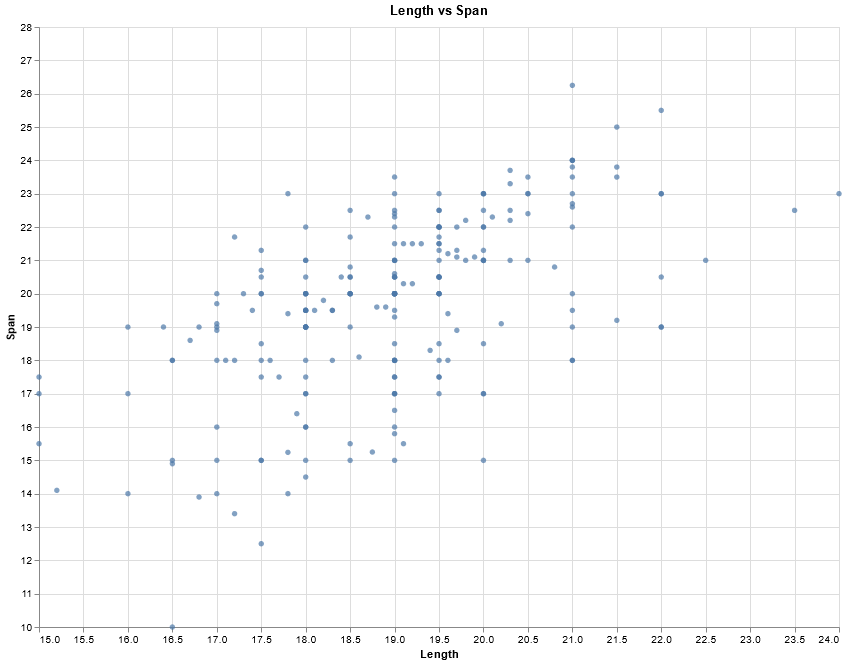

In [44]:
data.plot.scatterPlot("Length", "Span" , "Length vs Span" ).show()

Now we have the model 

$p(\sigma, \mu | D) = p(\sigma, \mu) p(D | \sigma, \mu) / p(D)$

In [13]:
val lengthData = Seq(20.0, 21.3, 22.9)

In [14]:
def likelihood(mu : Double, sigma : Double) : Double = 
    
    val likelihoodI = for length <- lengthData yield
        Gaussian(mu, sigma).pdf(length)
    likelihoodI.sum

In [18]:
val dMu = Gaussian(20.0, 1.0)
val dSigma = Uniform(0, 1)
val priorSamples = for i <- 0 until 100 yield (dMu.draw(), dSigma.draw())

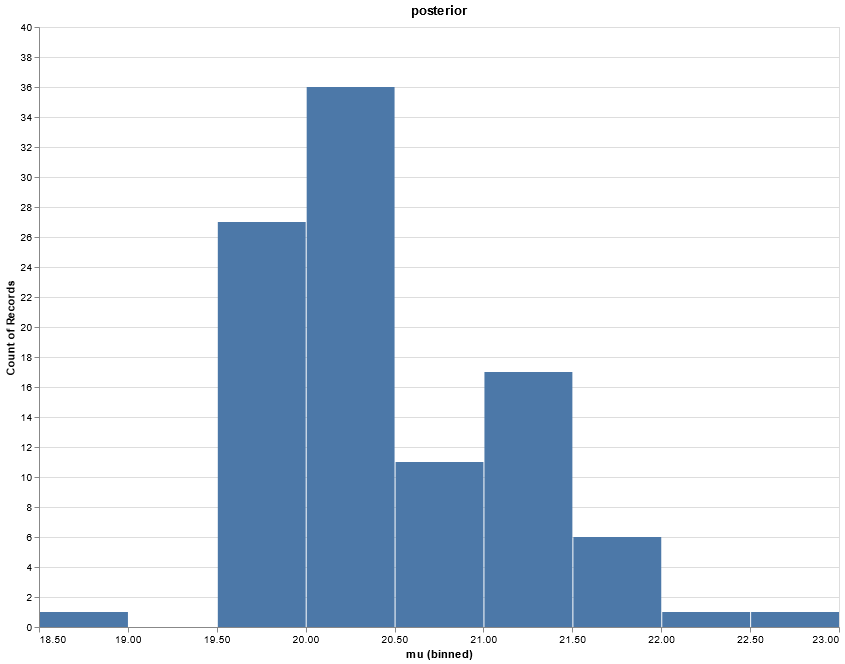

In [19]:
val likelihoods = for (mu, sigma) <- priorSamples yield likelihood(mu, sigma)
val n = likelihoods.sum
val qis = for (mu, sigma) <- priorSamples yield likelihood(mu, sigma) / n

val cumsum = qis.scanLeft[Double](0)((acc, x) => acc + x)
val samples = for priorSample <- priorSamples yield
    val r = Uniform(0, 1).draw()
    val i = cumsum.indexWhere(s => s > r) - 1
    priorSamples(i)

DataFrame.fromColumns(Seq(
    DataFrame.Column.ofContinuous(samples.map(s => s._1), "mu"), 
    DataFrame.Column.ofContinuous(samples.map(s => s._2), "sigma")
    )
).plot.histogram("mu", title= "posterior") .show()

In [21]:
println("hello world")

hello world


//p(h | mu, sigma) p(mu, sigma) / p(h) = p(h, mu, sigma) = p(mu, sigma | h) 